In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [80]:
df = pd.read_csv('cleaned_df_v2.csv')
df.head()

,price,security_deposit,cleaning_fee,availability_365,calculated_host_listings_count,reviews_per_month,minimum_nights,cancellation_policy,host_identity_verified,instant_bookable,...,days_since_calendar_updated,no_of_host_verifications,account_duration_days,amenities_count,Dog(s) present,Pets live on this property,space_char_count_grouped,description_char_count_grouped,neighborhood_overview_char_count_grouped,notes_char_count_grouped
0,85.0,0.0,0.0,346,2,4.07,1,2,1,0,...,28,4,1607,10,0,0,"(950, 1000]","(950, 1000]","(-1, 50]","(-1, 50]"
1,150.0,100.0,40.0,291,6,1.48,2,3,1,0,...,0,6,1047,16,0,0,"(950, 1000]","(950, 1000]","(150, 200]","(950, 1000]"
2,975.0,1000.0,300.0,220,2,1.15,4,3,1,0,...,35,5,571,21,1,1,"(950, 1000]","(950, 1000]","(650, 700]","(150, 200]"
3,450.0,700.0,125.0,365,1,0.89,1,3,1,0,...,49,5,1497,13,0,0,"(450, 500]","(950, 1000]","(450, 500]","(-1, 50]"
4,80.0,150.0,0.0,346,1,2.46,3,2,1,0,...,35,4,1314,7,0,0,"(950, 1000]","(950, 1000]","(50, 100]","(50, 100]"


In [2]:
df = pd.read_csv('cleaned_df_dropped_fts.csv')
df.head()

,host_is_superhost,no_of_host_verifications,host_response_time,number_of_reviews,amenities_count,calculated_host_listings_count,reviews_per_month,price,security_deposit,cleaning_fee,...,price_per_person,days_since_calendar_updated,account_duration_days,space_char_count,neighborhood_overview_char_count,notes_char_count,host_about_char_count,space_char_count_grouped,neighborhood_overview_char_count_grouped,notes_char_count_grouped
0,0,4,2,207,10,2,4.07,85.0,0.0,0.0,...,21.250000,28,1607,1000,0,0,372,20,1,1
1,1,6,1,43,16,6,1.48,150.0,100.0,40.0,...,37.500000,0,1047,1000,167,1000,74,20,4,20
2,0,5,2,20,21,2,1.15,975.0,1000.0,300.0,...,88.636364,35,571,1000,669,155,343,20,14,4
3,0,5,1,38,13,1,0.89,450.0,700.0,125.0,...,75.000000,49,1497,488,492,9,354,10,10,1
4,1,4,1,58,7,1,2.46,80.0,150.0,0.0,...,40.000000,35,1314,1000,95,82,229,20,2,2


In [3]:
df.dtypes

price                                       float64
security_deposit                            float64
cleaning_fee                                float64
availability_365                              int64
calculated_host_listings_count                int64
reviews_per_month                           float64
minimum_nights                                int64
cancellation_policy                           int64
host_identity_verified                        int64
instant_bookable                              int64
host_is_superhost                             int64
number_of_reviews                             int64
host_response_time                            int64
space_char_count                              int64
description_char_count                        int64
neighborhood_overview_char_count              int64
notes_char_count                              int64
host_about_char_count                         int64
price_per_person                            float64
listing_dura

# Examining each predictor variable individually against host_is_superhost

### Boolean & categorical variables

cancellation_policy, host_identity_verified, instant_bookable, host_is_superhost, host_response_time, Dog(s) present, Pets live on this property are categorical variables but are encoded with labels for usage in decision tree

For the Boolean vars, a count plot is used

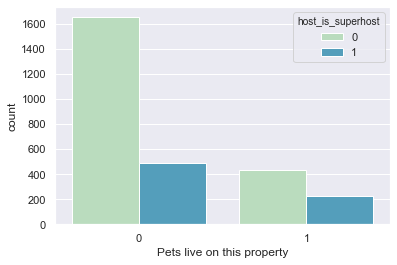

In [44]:
sb.countplot(x="Pets live on this property", hue="host_is_superhost", data=df, palette = 'GnBu')

In [46]:
pd.crosstab(df["Pets live on this property"],df["host_is_superhost"], normalize = 'columns')

host_is_superhost,0,1
Pets live on this property,,
0,0.793186,0.682893
1,0.206814,0.317107


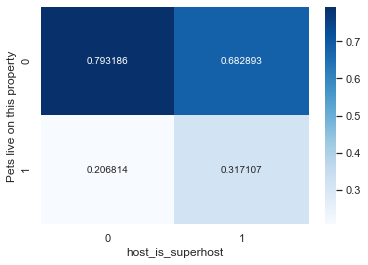

In [77]:
sb.heatmap(pd.crosstab(df["Pets live on this property"],df["host_is_superhost"], normalize = 'columns'),annot=True, cmap="Blues", fmt = 'g')


A bigger % of superhosts have pets living on their property

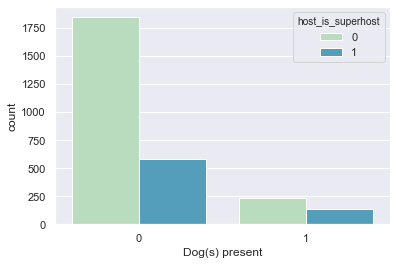

In [22]:
sb.countplot(x="Dog(s) present", hue="host_is_superhost", data=df, palette = 'GnBu')

In [23]:
pd.crosstab(df["Dog(s) present"],df["host_is_superhost"], normalize = 'columns')

host_is_superhost,0,1
Dog(s) present,,
0,0.885797,0.808067
1,0.114203,0.191933


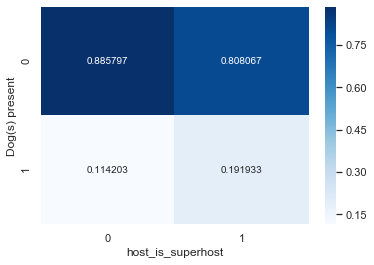

In [25]:
sb.heatmap(pd.crosstab(df["Dog(s) present"],df["host_is_superhost"], normalize = 'columns'),annot=True, cmap="Blues", fmt = 'g')

A bigger % of superhosts have Dog(s) present in their property

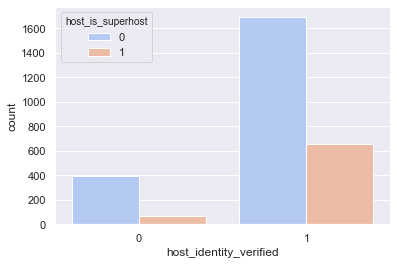

In [9]:
sb.countplot(x="host_identity_verified", hue="host_is_superhost", data=df, palette = "coolwarm")

In [5]:
pd.crosstab(df["host_identity_verified"],df["host_is_superhost"], normalize = 'columns')

host_is_superhost,0,1
host_identity_verified,,
0,0.1881,0.090403
1,0.8119,0.909597


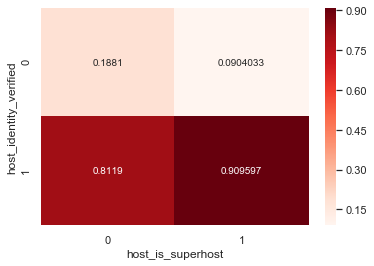

In [6]:
sb.heatmap(pd.crosstab(df["host_identity_verified"],df["host_is_superhost"], normalize = 'columns'),annot=True, cmap="Reds", fmt = 'g')


Less % of superhosts have their identity not verified, so "host_identity_verified" is another possible predictor variable

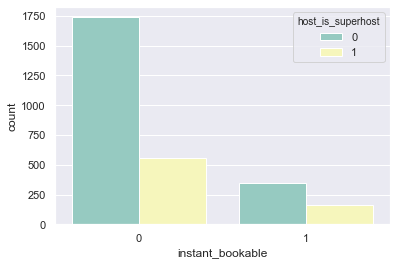

In [10]:
sb.countplot(x="instant_bookable", hue="host_is_superhost", data=df, palette = "Set3")

In [11]:
pd.crosstab(df["instant_bookable"],df["host_is_superhost"], normalize = 'columns')

host_is_superhost,0,1
instant_bookable,,
0,0.834453,0.776078
1,0.165547,0.223922


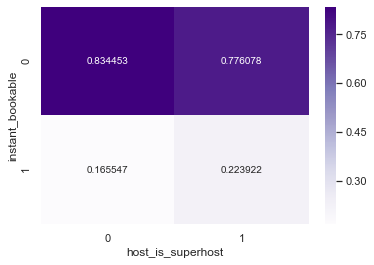

In [14]:
sb.heatmap(pd.crosstab(df["instant_bookable"],df["host_is_superhost"], normalize = 'columns'),annot=True, cmap="Purples", fmt = 'g')


Not much difference in terms of %; will be removed as a predictor

In [81]:
df = df.drop(["instant_bookable"], axis = 1)

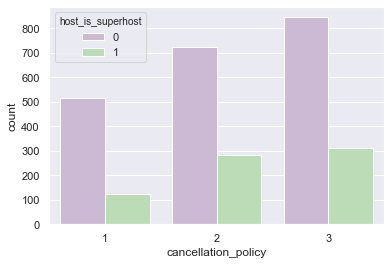

In [17]:
sb.countplot(x="cancellation_policy", hue="host_is_superhost", data=df, palette = "PRGn")

In [18]:
pd.crosstab(df["cancellation_policy"],df["host_is_superhost"], normalize = 'columns')

host_is_superhost,0,1
cancellation_policy,,
1,0.247121,0.172462
2,0.346929,0.394993
3,0.405950,0.432545


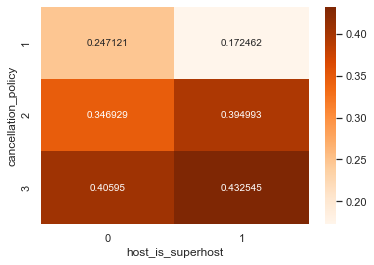

In [21]:
sb.heatmap(pd.crosstab(df["cancellation_policy"],df["host_is_superhost"], normalize = 'columns'),annot=True, cmap="Oranges", fmt = 'g')


Superhosts generally tend towards strict (3) and moderate (2) cancellation policies; a greater proportion of non-superhosts have a flexible (1) cancellation policy; but this may not be a good predictor variable due to small % differences

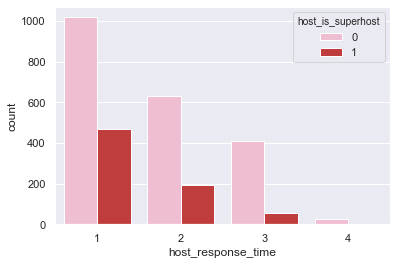

In [34]:
sb.countplot(x="host_response_time", hue="host_is_superhost", data=df, palette = "tab20_r")


In [38]:
pd.crosstab(df["host_response_time"],df["host_is_superhost"])

host_is_superhost,0,1
host_response_time,,
1,1019,470
2,629,194
3,409,54
4,27,1


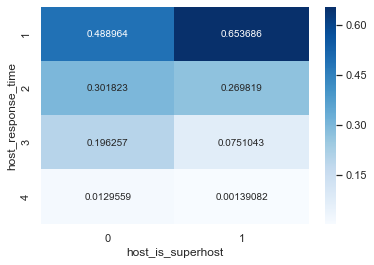

In [40]:
sb.heatmap(pd.crosstab(df["host_response_time"],df["host_is_superhost"], normalize = 'columns'),annot=True, cmap="Blues", fmt = 'g')


Superhosts generally have a faster response time; a possible predictor variable

## Numeric variables

In [43]:
df.select_dtypes(include = 'number').head()

,price,security_deposit,cleaning_fee,availability_365,calculated_host_listings_count,reviews_per_month,minimum_nights,cancellation_policy,host_identity_verified,host_is_superhost,...,host_about_char_count,price_per_person,listing_duration_days,hosting_duration_days,days_since_calendar_updated,no_of_host_verifications,account_duration_days,amenities_count,Dog(s) present,Pets live on this property
0,85.0,0.0,0.0,346,2,4.07,1,2,1,0,...,372,21.250000,1523,1605,28,4,1607,10,0,0
1,150.0,100.0,40.0,291,6,1.48,2,3,1,1,...,74,37.500000,862,1041,0,6,1047,16,0,0
2,975.0,1000.0,300.0,220,2,1.15,4,3,1,0,...,343,88.636364,400,448,35,5,571,21,1,1
3,450.0,700.0,125.0,365,1,0.89,1,3,1,0,...,354,75.000000,1201,1425,49,5,1497,13,0,0
4,80.0,150.0,0.0,346,1,2.46,3,2,1,1,...,229,40.000000,679,1286,35,4,1314,7,0,0


In [44]:
df.select_dtypes(include = 'number').describe()

,price,security_deposit,cleaning_fee,availability_365,calculated_host_listings_count,reviews_per_month,minimum_nights,cancellation_policy,host_identity_verified,host_is_superhost,...,host_about_char_count,price_per_person,listing_duration_days,hosting_duration_days,days_since_calendar_updated,no_of_host_verifications,account_duration_days,amenities_count,Dog(s) present,Pets live on this property
count,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.00000,2803.000000,2803.000000,2803.000000,...,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000
mean,124.250089,140.384945,47.256511,254.756689,3.241527,2.220999,2.41741,2.184802,0.836960,0.256511,...,403.226543,39.151493,355.082768,835.433107,23.244381,4.845523,899.007492,14.603996,0.134142,0.235105
std,87.060014,215.089167,49.756784,120.272846,6.291160,1.854818,18.96625,0.778978,0.369468,0.436785,...,447.603770,17.863231,401.305912,548.458522,36.692394,1.030255,557.062450,4.677861,0.340866,0.424140
min,22.000000,0.000000,0.000000,0.000000,1.000000,0.030000,1.00000,1.000000,0.000000,0.000000,...,0.000000,4.750000,0.000000,0.000000,0.000000,1.000000,101.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,10.000000,150.000000,1.000000,0.810000,1.00000,2.000000,1.000000,0.000000,...,85.000000,27.500000,72.000000,397.000000,1.000000,4.000000,449.500000,12.000000,0.000000,0.000000
50%,100.000000,95.000000,35.000000,320.000000,1.000000,1.720000,2.00000,2.000000,1.000000,0.000000,...,297.000000,35.000000,193.000000,769.000000,7.000000,5.000000,835.000000,14.000000,0.000000,0.000000
75%,150.000000,200.000000,70.000000,359.000000,2.000000,3.150000,2.00000,3.000000,1.000000,1.000000,...,577.000000,47.500000,497.500000,1198.500000,28.000000,5.000000,1271.000000,17.000000,0.000000,0.000000
max,999.000000,2500.000000,300.000000,365.000000,37.000000,12.150000,1000.00000,3.000000,1.000000,1.000000,...,4354.000000,249.750000,2355.000000,2578.000000,426.000000,8.000000,2611.000000,30.000000,1.000000,1.000000


We'll examine no_of_host_verifications first, which has the smallest range

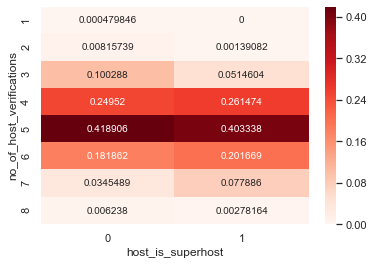

In [48]:
sb.heatmap(pd.crosstab(df["no_of_host_verifications"],df["host_is_superhost"], normalize = 'columns'),annot=True, cmap="Reds", fmt = 'g')


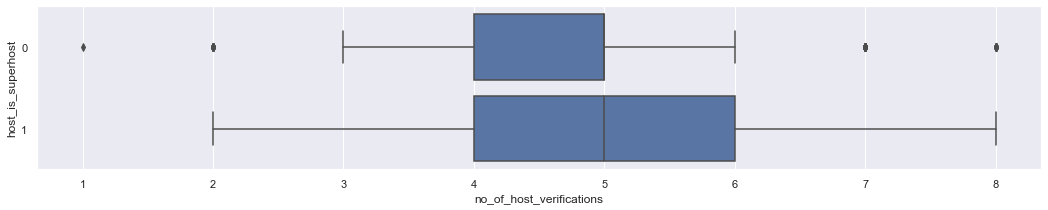

In [49]:
f, axes = plt.subplots(1, 1, figsize=(18, 3))
sb.boxplot(x="no_of_host_verifications", y="host_is_superhost", data=df, orient = "h", color = 'b')

May not be as useful as a predictor

In [50]:
df.columns

Index(['price', 'security_deposit', 'cleaning_fee', 'availability_365',
       'calculated_host_listings_count', 'reviews_per_month', 'minimum_nights',
       'cancellation_policy', 'host_identity_verified', 'host_is_superhost',
       'number_of_reviews', 'host_response_time', 'space_char_count',
       'description_char_count', 'neighborhood_overview_char_count',
       'notes_char_count', 'host_about_char_count', 'price_per_person',
       'listing_duration_days', 'hosting_duration_days',
       'days_since_calendar_updated', 'no_of_host_verifications',
       'account_duration_days', 'amenities_count', 'Dog(s) present',
       'Pets live on this property', 'space_char_count_grouped',
       'description_char_count_grouped',
       'neighborhood_overview_char_count_grouped', 'notes_char_count_grouped'],
      dtype='object')

Examining 'amenities','calculated_host_listings_count', 'reviews_per_month', 'number_of_reviews', 'minimum_nights'

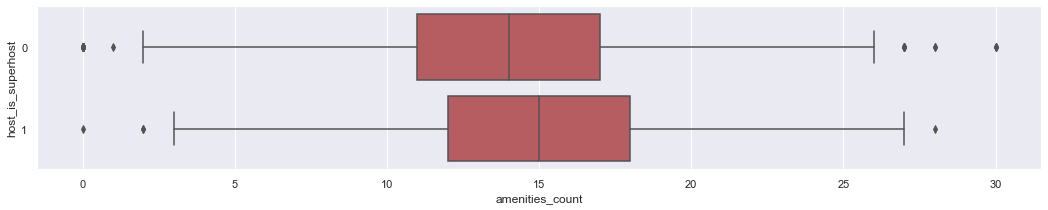

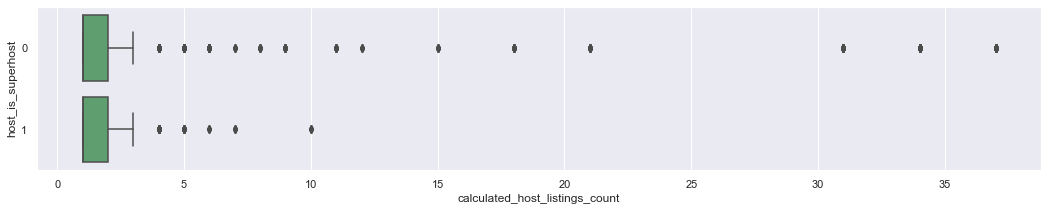

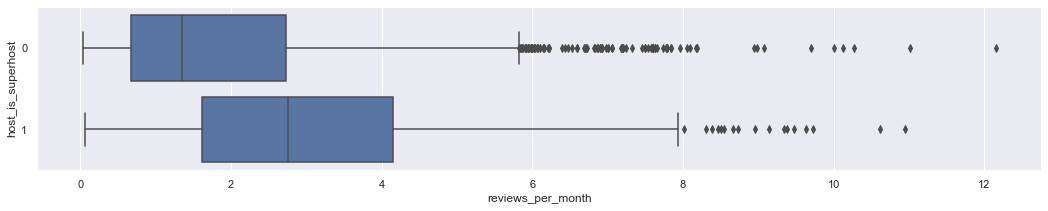

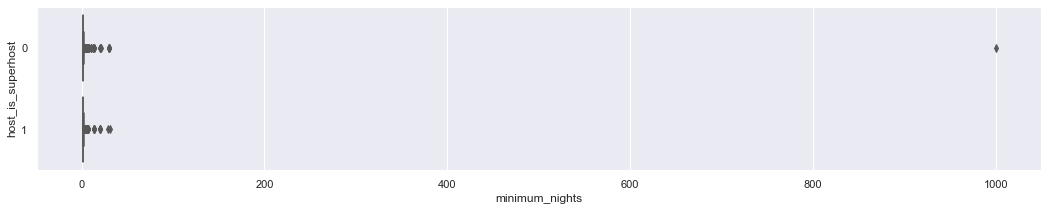

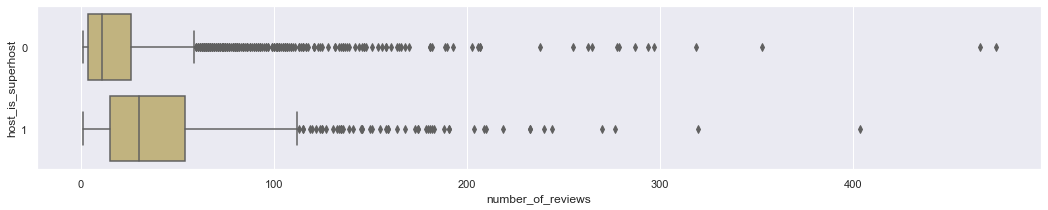

In [52]:
num_vars = ['amenities_count','calculated_host_listings_count', 'reviews_per_month', 'minimum_nights', 'number_of_reviews']
colors = ["r", "g", "b", "m", 'y']
count = 0

for var in num_vars:
    f, axes = plt.subplots(1, 1, figsize=(18, 3))
    sb.boxplot(x=var, y="host_is_superhost", data=df, orient = "h", color=colors[count])
    count+=1


1)**For amenities, there is a higher median**, which should be expected maybe for a superhost

2)For calculated_host_listings_count, the median is 1 for both superhosts and non-superhosts. Those with several listings may be property magnates / companies looking to rent out their properties. **Thus their distributions are generally similar**

3)**Comparing the medians, Superhosts also receive more reviews per month on average,** maybe because they have provided a good experience and customers want to leave a good review for them

4)For minimum_nights, there is 1 outlier at a 1000, possibly a long term rental property, so I will reexamine the variable by changing the x-axis limits

5)**Comparing the medians, Superhosts also receive a greater total number of reviews on average,** it could be that they have higher turnover rates or guests feel more inclined to leave a review. I will reexamine this variable after limiting the axis


Not much difference exists for calculated_host_listings_count, so it could be dropped

In [88]:
df['minimum_nights'].value_counts()

2       1276
1       1248
3        410
4         92
5         53
7         34
6         13
14        10
20         6
30         6
10         3
26         1
29         1
1000       1
12         1
13         1
21         1
31         1
Name: minimum_nights, dtype: int64

most are <35, so I will set the x axis limit as 35 for minimum nights

(0, 35)

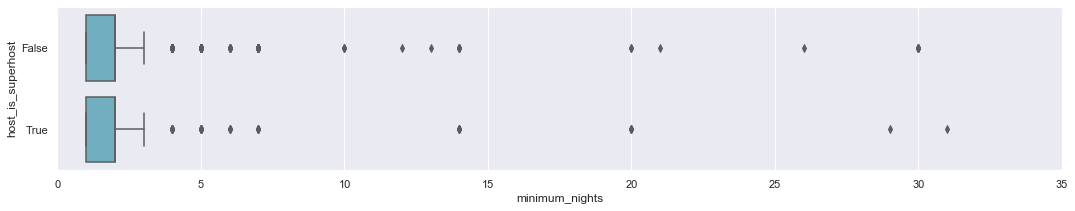

In [87]:
f, axes = plt.subplots(1, 1, figsize=(18, 3))
sb.boxplot(x="minimum_nights", y="host_is_superhost", data=df, orient = "h", color="c")
plt.xlim(0,35)

Again, a similar median and 'box-and-whiskers' is observed. So there is not much difference in the distributions between superhosts and nonsuperhosts if comparing only minimum_nights; understandably since there need not be such limits to distinguish between the 2. This will be dropped.

In [82]:
df = df.drop(["minimum_nights"], axis = 1)

In [62]:
df['number_of_reviews'].value_counts()

1      209
2      169
4      131
3      122
5      105
6       95
7       95
12      75
10      74
14      71
9       68
11      66
8       66
13      59
18      55
16      55
15      54
17      47
20      44
22      38
19      36
21      36
23      34
26      33
28      32
25      31
29      29
27      28
31      26
30      26
      ... 
265      1
287      1
277      1
466      1
180      1
122      1
128      1
138      1
142      1
144      1
148      1
150      1
154      1
156      1
166      1
170      1
188      1
404      1
190      1
204      1
206      1
210      1
238      1
240      1
244      1
270      1
278      1
294      1
320      1
353      1
Name: number_of_reviews, Length: 194, dtype: int64

Majority are less than 100 or so, so I will limit the axis accordiingly

(0, 120)

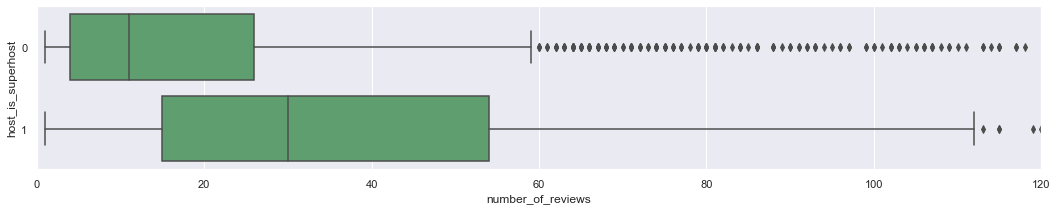

In [61]:
f, axes = plt.subplots(1, 1, figsize=(18, 3))
sb.boxplot(x="number_of_reviews", y="host_is_superhost", data=df, orient = "h", color="g")
plt.xlim(0,120)

There is quite some difference in the median, so number_of_reviews could be a good predictor variable

In [64]:
df.select_dtypes(include = 'number').describe()

,price,security_deposit,cleaning_fee,availability_365,calculated_host_listings_count,reviews_per_month,cancellation_policy,host_identity_verified,host_is_superhost,number_of_reviews,...,host_about_char_count,price_per_person,listing_duration_days,hosting_duration_days,days_since_calendar_updated,no_of_host_verifications,account_duration_days,amenities_count,Dog(s) present,Pets live on this property
count,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,...,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000
mean,124.250089,140.384945,47.256511,254.756689,3.241527,2.220999,2.184802,0.836960,0.256511,28.887977,...,403.226543,39.151493,355.082768,835.433107,23.244381,4.845523,899.007492,14.603996,0.134142,0.235105
std,87.060014,215.089167,49.756784,120.272846,6.291160,1.854818,0.778978,0.369468,0.436785,41.481362,...,447.603770,17.863231,401.305912,548.458522,36.692394,1.030255,557.062450,4.677861,0.340866,0.424140
min,22.000000,0.000000,0.000000,0.000000,1.000000,0.030000,1.000000,0.000000,0.000000,1.000000,...,0.000000,4.750000,0.000000,0.000000,0.000000,1.000000,101.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,10.000000,150.000000,1.000000,0.810000,2.000000,1.000000,0.000000,5.000000,...,85.000000,27.500000,72.000000,397.000000,1.000000,4.000000,449.500000,12.000000,0.000000,0.000000
50%,100.000000,95.000000,35.000000,320.000000,1.000000,1.720000,2.000000,1.000000,0.000000,14.000000,...,297.000000,35.000000,193.000000,769.000000,7.000000,5.000000,835.000000,14.000000,0.000000,0.000000
75%,150.000000,200.000000,70.000000,359.000000,2.000000,3.150000,3.000000,1.000000,1.000000,35.000000,...,577.000000,47.500000,497.500000,1198.500000,28.000000,5.000000,1271.000000,17.000000,0.000000,0.000000
max,999.000000,2500.000000,300.000000,365.000000,37.000000,12.150000,3.000000,1.000000,1.000000,474.000000,...,4354.000000,249.750000,2355.000000,2578.000000,426.000000,8.000000,2611.000000,30.000000,1.000000,1.000000


In [67]:
df.columns

Index(['price', 'security_deposit', 'cleaning_fee', 'availability_365',
       'calculated_host_listings_count', 'reviews_per_month',
       'cancellation_policy', 'host_identity_verified', 'host_is_superhost',
       'number_of_reviews', 'host_response_time', 'space_char_count',
       'description_char_count', 'neighborhood_overview_char_count',
       'notes_char_count', 'host_about_char_count', 'price_per_person',
       'listing_duration_days', 'hosting_duration_days',
       'days_since_calendar_updated', 'no_of_host_verifications',
       'account_duration_days', 'amenities_count', 'Dog(s) present',
       'Pets live on this property', 'space_char_count_grouped',
       'description_char_count_grouped',
       'neighborhood_overview_char_count_grouped', 'notes_char_count_grouped'],
      dtype='object')

In [68]:
cols = df.columns.tolist()

Order the columns based on what has been examined and what has not

In [83]:
df.shape

(2803, 29)

In [86]:
df = df[['host_is_superhost','host_identity_verified', 'Dog(s) present','Pets live on this property','cancellation_policy', 
         'no_of_host_verifications', 'host_response_time',
        'number_of_reviews', 'amenities_count', 'calculated_host_listings_count', 'reviews_per_month',
'price',
 'security_deposit',
 'cleaning_fee',
 'availability_365',
'listing_duration_days',
 'hosting_duration_days',
'price_per_person',
'days_since_calendar_updated',
 'account_duration_days',
 'space_char_count',
 'description_char_count',
 'neighborhood_overview_char_count',
 'notes_char_count',
 'host_about_char_count',
 'space_char_count_grouped',
 'description_char_count_grouped',
 'neighborhood_overview_char_count_grouped',
 'notes_char_count_grouped']]

In [87]:
df.shape

(2803, 29)

Next, we'll move on to the other numeric variables: 'price', 'security_deposit', 'cleaning_fee', 'availability_365', 'listing_duration_days', 'hosting_duration_days', 'price_per_person'

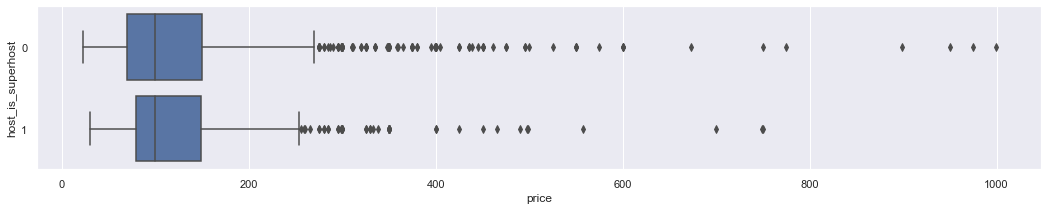

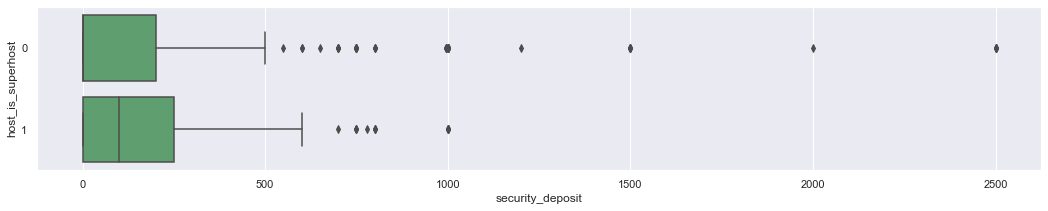

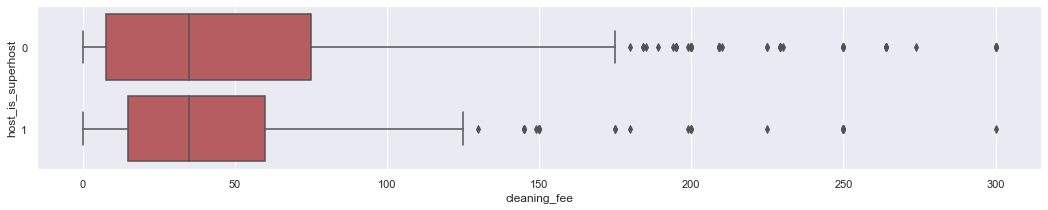

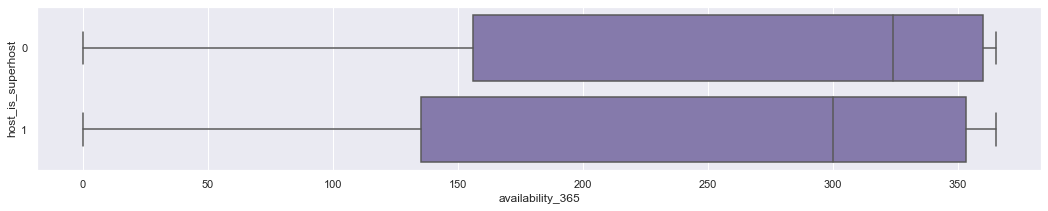

In [90]:
num_vars_2 = ['price', 'security_deposit', 'cleaning_fee', 'availability_365']
colors = ["b","g","r", "m"]
count = 0

for var in num_vars_2:
    f, axes = plt.subplots(1, 1, figsize=(18, 3))
    sb.boxplot(x=var, y="host_is_superhost", data=df, orient = "h", color=colors[count])
    count+=1

1)For price, I will reexamine the box plot by limiting the axes

2)^ Same for Security_deposit

3)Cleaning fee has the same median, but lower Q3 for the superhosts, so it may be slightly cheaper for superhosts in general

4)**For availability_365, the median is higher for non-superhosts**, maybe because superhosts are booked more often

(0, 300)

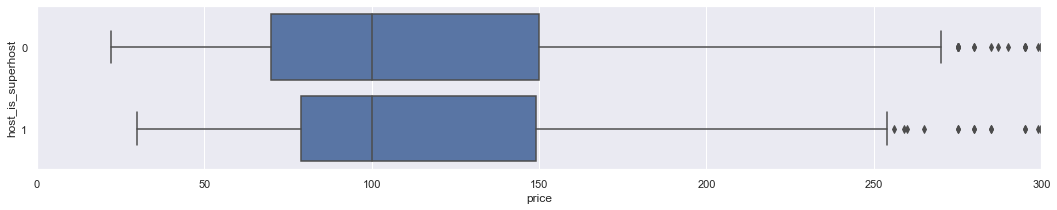

In [91]:
f, axes = plt.subplots(1, 1, figsize=(18, 3))
sb.boxplot(x="price", y="host_is_superhost", data=df, orient = "h", color="b")
plt.xlim(0,300)

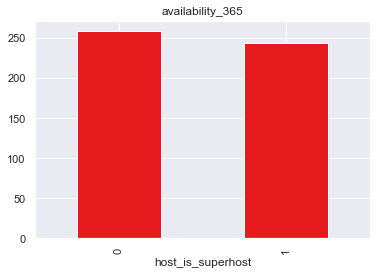

In [5]:
pd.pivot_table(df, index="host_is_superhost", values=['availability_365']).plot.bar(colormap='Set1', legend = False, title='availability_365')


-One can see superhosts & non-superhosts have the same median but superhosts are more packed near the median.

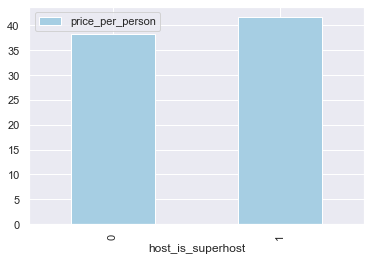

In [40]:
pd.pivot_table(df, index="host_is_superhost", values=['price_per_person']).plot.bar(colormap='Paired')


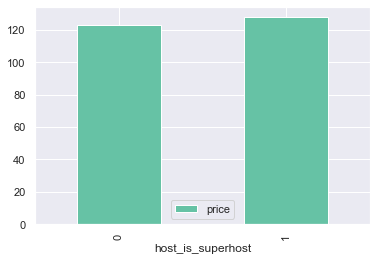

In [30]:
pd.pivot_table(df, index="host_is_superhost", values=["price"]).plot.bar(colormap='Set2')


### <font color=red>**Thus price may not differ much between superhosts & nonsuperhosts**</font>

(0, 700)

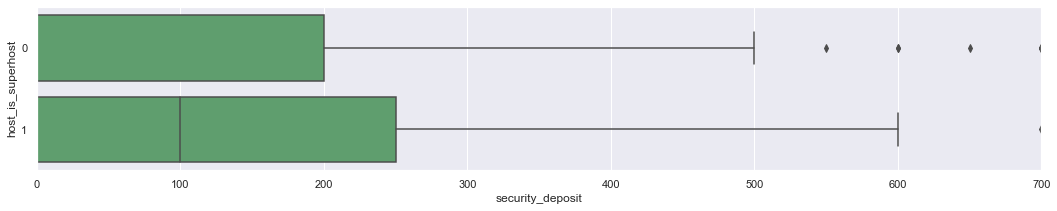

In [95]:
f, axes = plt.subplots(1, 1, figsize=(18, 3))
sb.boxplot(x="security_deposit", y="host_is_superhost", data=df, orient = "h", color="g")
plt.xlim(0,700)

-**Superhost listings have a higher median security deposit**

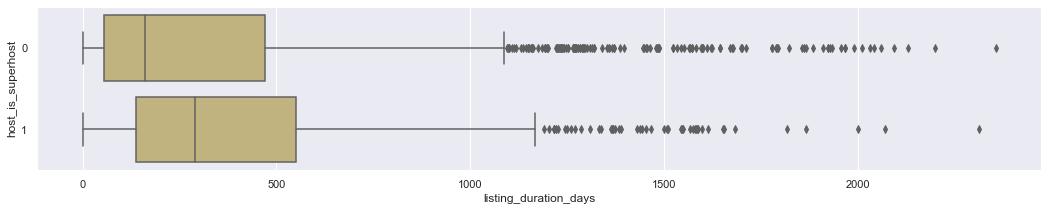

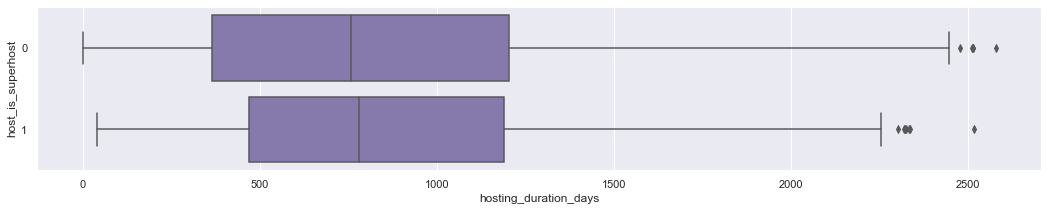

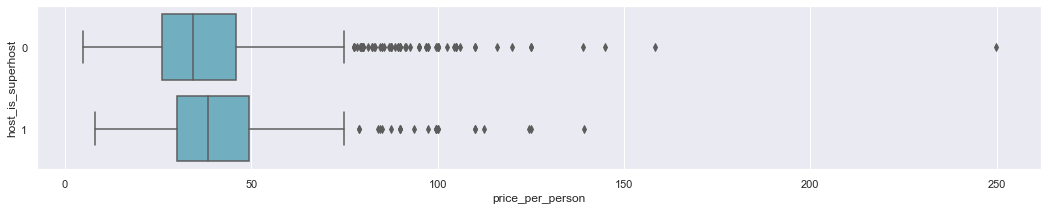

In [96]:
num_vars_3 = ['listing_duration_days', 'hosting_duration_days', 'price_per_person']
colors = ["y", "m", "c"]
count = 0

for var in num_vars_3:
    f, axes = plt.subplots(1, 1, figsize=(18, 3))
    sb.boxplot(x=var, y="host_is_superhost", data=df, orient = "h", color=colors[count])
    count+=1

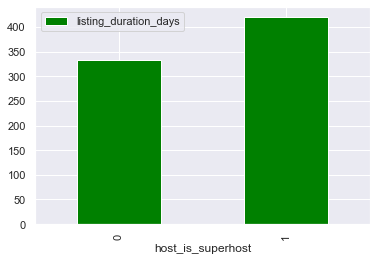

In [5]:
pd.pivot_table(df, index="host_is_superhost", values=['listing_duration_days']).plot.bar(colormap='ocean')

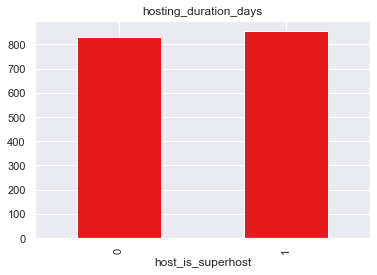

In [4]:
pd.pivot_table(df, index="host_is_superhost", values=['hosting_duration_days']).plot.bar(colormap='Set1', legend = False, title='hosting_duration_days')


1)**For listing_duration_days, median is much higher for superhosts.**

2)For hosting_duration_days, median is slightly higher for superhost listings. The superhosts may have more experience with hosting

3)median for price_per_person is slightly higher for superhost listings

For the swarmplots below, since the dataset is imbalanced with more nonsuperhost datapoints than superhosts, just because there are more nonsuperhosts than superhosts at a certain value does not make it a good predictor variable; proportionality should be taken into account. The purpose of the swarmplots is to visualise the count/frequency of each value

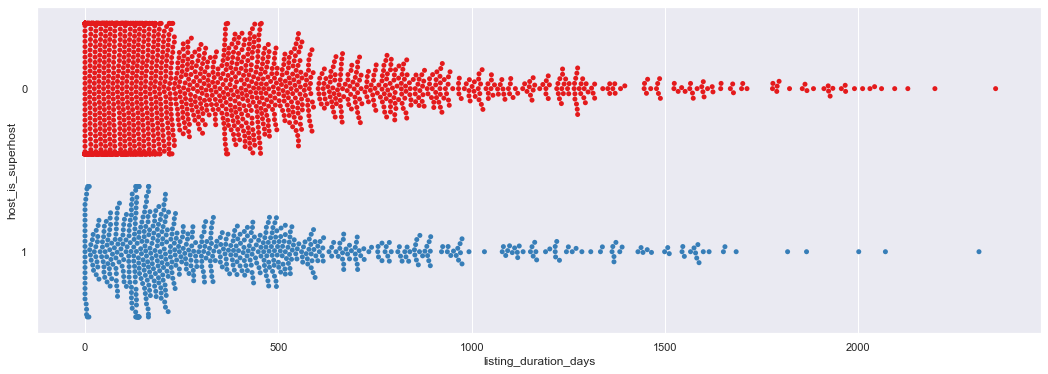

In [97]:
# Create a joint dataframe
jointDF_listing_duration_days = pd.concat([df["listing_duration_days"], df["host_is_superhost"].reindex(index=df["listing_duration_days"].index)], sort = False, axis = 1)


# Joint Swarmplot 
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "listing_duration_days", y = "host_is_superhost", data = jointDF_listing_duration_days, orient = "h", palette = "Set1")


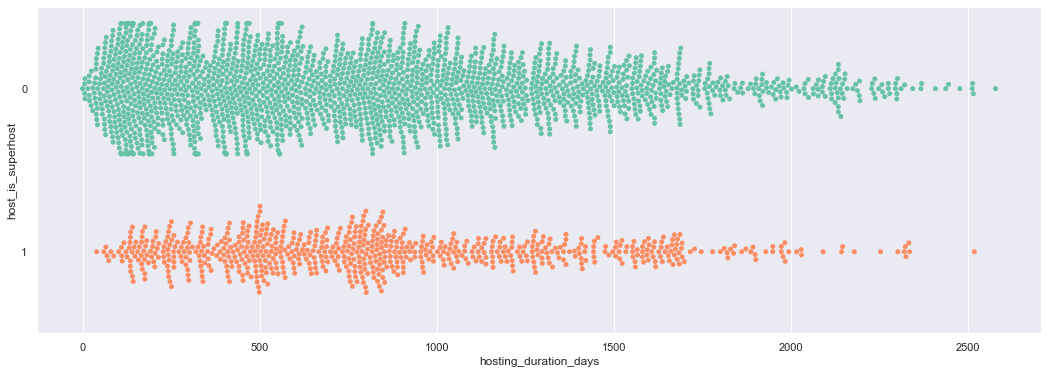

In [98]:

# Create a joint dataframe
jointDF_hosting_duration_days = pd.concat([df["hosting_duration_days"], df["host_is_superhost"].reindex(index=df["hosting_duration_days"].index)], sort = False, axis = 1)


# Joint Swarmplot 
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "hosting_duration_days", y = "host_is_superhost", data = jointDF_hosting_duration_days, orient = "h", palette = "Set2")


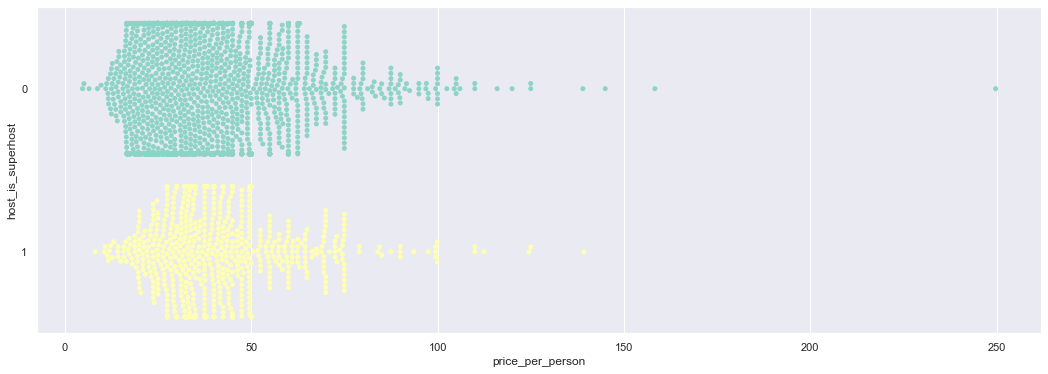

In [99]:
# Create a joint dataframe
jointDF_price_per_person = pd.concat([df["price_per_person"], df["host_is_superhost"].reindex(index=df["price_per_person"].index)], sort = False, axis = 1)


# Joint Swarmplot 
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "price_per_person", y = "host_is_superhost", data = jointDF_price_per_person, orient = "h", palette = "Set3")


In [101]:
df.columns

Index(['host_is_superhost', 'host_identity_verified', 'Dog(s) present',
       'Pets live on this property', 'cancellation_policy',
       'no_of_host_verifications', 'host_response_time', 'number_of_reviews',
       'amenities_count', 'calculated_host_listings_count',
       'reviews_per_month', 'price', 'security_deposit', 'cleaning_fee',
       'availability_365', 'listing_duration_days', 'hosting_duration_days',
       'price_per_person', 'days_since_calendar_updated',
       'account_duration_days', 'space_char_count', 'description_char_count',
       'neighborhood_overview_char_count', 'notes_char_count',
       'host_about_char_count', 'space_char_count_grouped',
       'description_char_count_grouped',
       'neighborhood_overview_char_count_grouped', 'notes_char_count_grouped'],
      dtype='object')

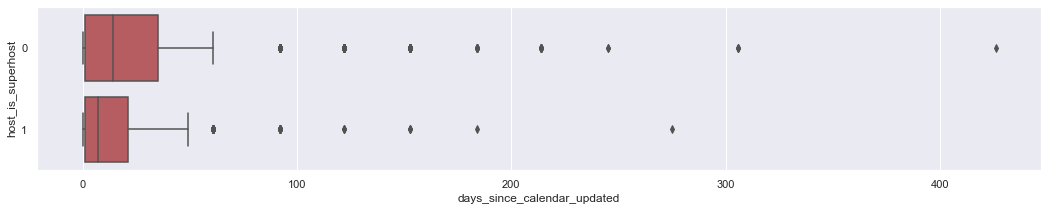

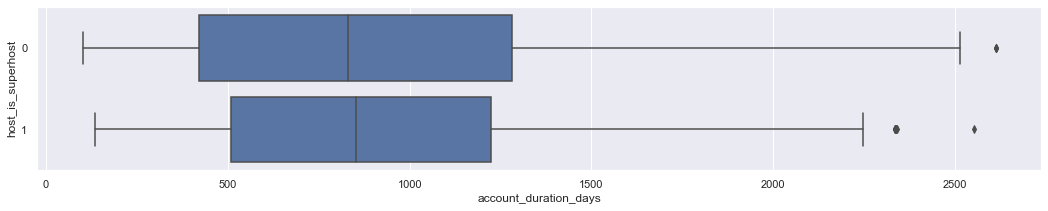

In [103]:
num_vars_iv = ['days_since_calendar_updated','account_duration_days']
colors = ["r", "b"]
count = 0

for var in num_vars_iv:
    f, axes = plt.subplots(1, 1, figsize=(18, 3))
    sb.boxplot(x=var, y="host_is_superhost", data=df, orient = "h", color=colors[count])
    count+=1

-Lower median for superhosts for days_since_calendar_updated

-slightly higher median for account_duration_days but that may be dropped due to redundancy of the variable, it is quite similar to hosting_duration_days

In [105]:
df.columns

Index(['host_is_superhost', 'host_identity_verified', 'Dog(s) present',
       'Pets live on this property', 'cancellation_policy',
       'no_of_host_verifications', 'host_response_time', 'number_of_reviews',
       'amenities_count', 'calculated_host_listings_count',
       'reviews_per_month', 'price', 'security_deposit', 'cleaning_fee',
       'availability_365', 'listing_duration_days', 'hosting_duration_days',
       'price_per_person', 'days_since_calendar_updated',
       'account_duration_days', 'space_char_count', 'description_char_count',
       'neighborhood_overview_char_count', 'notes_char_count',
       'host_about_char_count', 'space_char_count_grouped',
       'description_char_count_grouped',
       'neighborhood_overview_char_count_grouped', 'notes_char_count_grouped'],
      dtype='object')

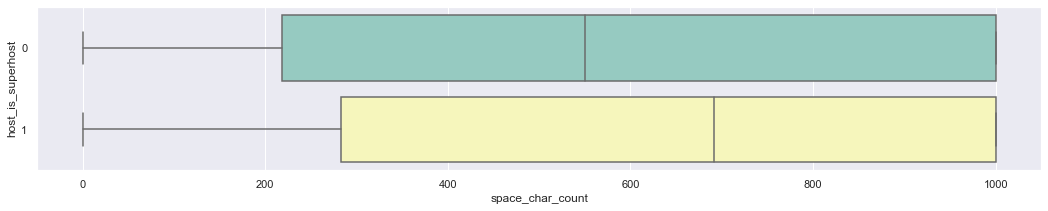

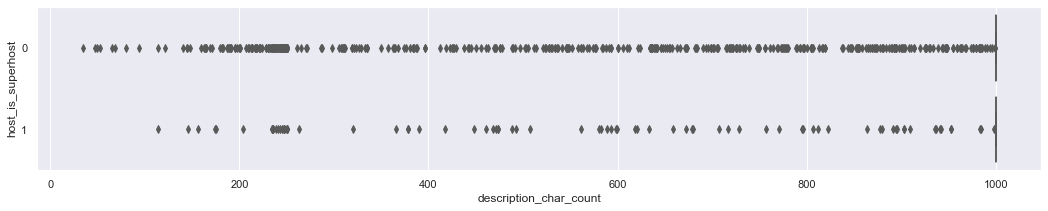

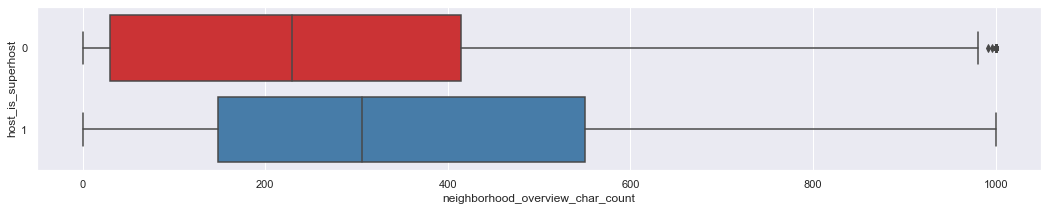

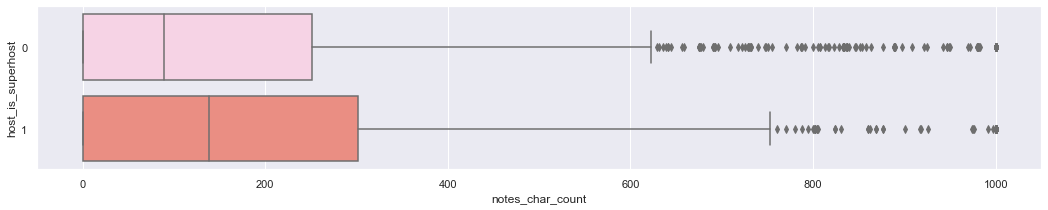

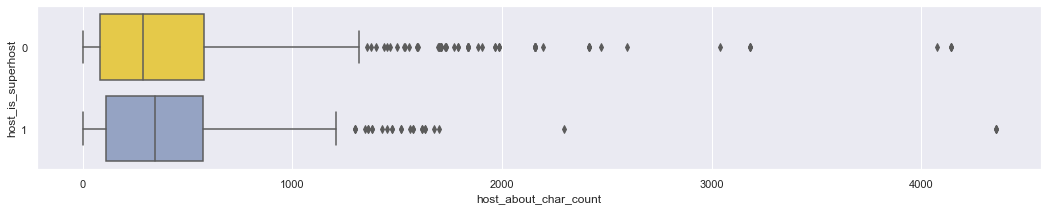

In [121]:
num_vars_5 = ['space_char_count', 'description_char_count',
       'neighborhood_overview_char_count', 'notes_char_count',
       'host_about_char_count']
palettes = ["Set3", "Set2", "Set1",'Set3_r','Set2_r']
count = 0

for var in num_vars_5:
    f, axes = plt.subplots(1, 1, figsize=(18, 3))
    sb.boxplot(x=var, y="host_is_superhost", data=df, orient = "h", palette=palettes[count])
    count+=1

Median is generally higher for superhosts; description shall be dropped as it may not provide sufficient information to predict

In [127]:
df = df.drop(["description_char_count"], axis = 1)

In [150]:
df.to_csv ('~/Downloads/cleaned_df_v3.csv', index = False, header=True)

After encoding the labels for the binned variables,

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
df = pd.read_csv('cleaned_df_v3.1.csv')
df.head()

,host_is_superhost,host_identity_verified,Dog(s) present,Pets live on this property,cancellation_policy,no_of_host_verifications,host_response_time,number_of_reviews,amenities_count,calculated_host_listings_count,...,days_since_calendar_updated,account_duration_days,space_char_count,neighborhood_overview_char_count,notes_char_count,host_about_char_count,space_char_count_grouped,description_char_count_grouped,neighborhood_overview_char_count_grouped,notes_char_count_grouped
0,0,1,0,0,2,4,2,207,10,2,...,28,1607,1000,0,0,372,20,20,1,1
1,1,1,0,0,3,6,1,43,16,6,...,0,1047,1000,167,1000,74,20,20,4,20
2,0,1,1,1,3,5,2,20,21,2,...,35,571,1000,669,155,343,20,20,14,4
3,0,1,0,0,3,5,1,38,13,1,...,49,1497,488,492,9,354,10,20,10,1
4,1,1,0,0,2,4,1,58,7,1,...,35,1314,1000,95,82,229,20,20,2,2


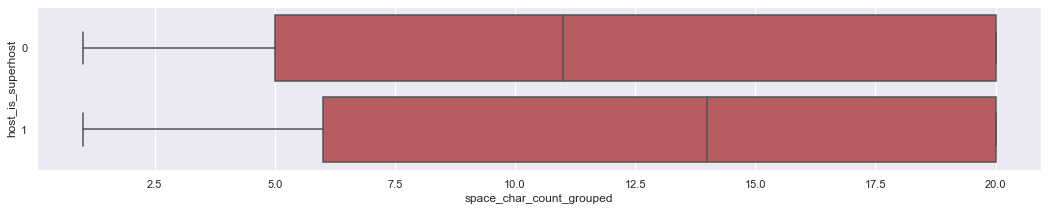

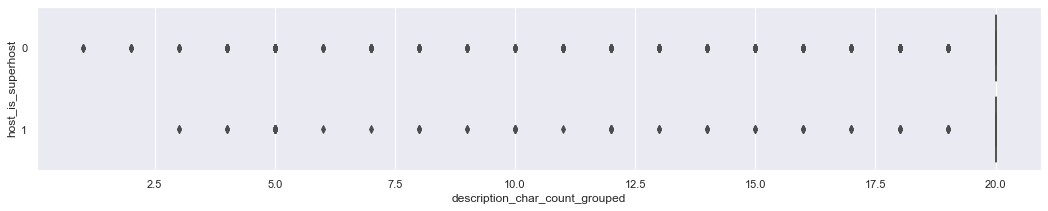

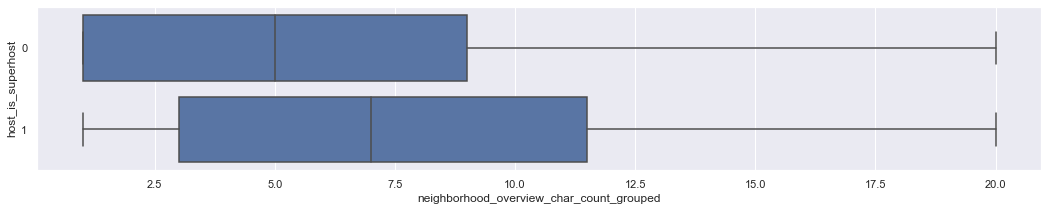

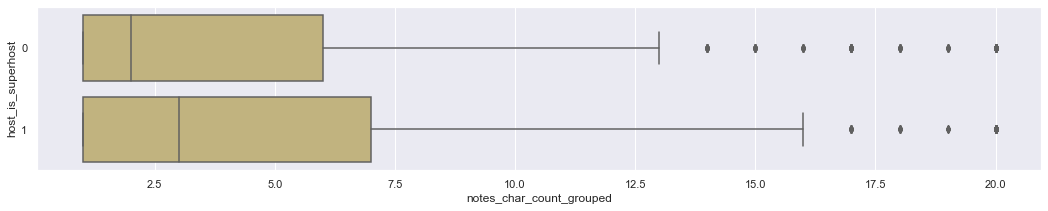

In [4]:
num_vars_6 = ['space_char_count_grouped',
       'description_char_count_grouped',
       'neighborhood_overview_char_count_grouped', 'notes_char_count_grouped']
colors = ['r','g','b','y']
count = 0

for var in num_vars_6:
    f, axes = plt.subplots(1, 1, figsize=(18, 3))
    sb.boxplot(x=var, y="host_is_superhost", data=df, orient = "h", color=colors[count])
    count+=1

description_char_count_grouped could be dropped too but will keep it for now